In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Recommendation System_Assignment/ratings_Electronics.csv', header = None)

In [169]:
df.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


### The lodead data set not have column heads so we need to set column names as per data description.

## Column Name setting:

In [0]:
df.columns = ['User ID', 'Product ID', 'Ratings', 'Timestamp']

In [171]:
df.head()

,User ID,Product ID,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [172]:
df.shape

(7824482, 4)

### Initially we have 7.8 million records and 4 columns in the loaded data set.

## Dropping "Timestamp" since it is not needed for this project.

In [0]:
df1 = df.drop(['Timestamp'], axis=1)

In [174]:
df1.head()

,User ID,Product ID,Ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


# Exploratory data analysis

## Missing Values checking:

In [0]:
missing = df1.isnull().sum().sort_values(ascending=False)

In [176]:
print(missing)

Ratings       0
Product ID    0
User ID       0
dtype: int64


#### Ther is no missing values

### Unique User ID count prediction

In [0]:
user_id_count=df1['User ID'].value_counts()

In [178]:
print(user_id_count)

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A1IMNY899K4OVT      1
A2Q9ZMV77S7R3B      1
A1YY0AFBR76STU      1
A36KAXWCTT5ISV      1
APOYZ7AX2MI4G       1
Name: User ID, Length: 4201696, dtype: int64


#### We infer that there are 4201696 users participated in this *ratings*

### Unique Product ID count prediction:

In [0]:
product_id_count=df1['Product ID'].value_counts()

In [180]:
print(product_id_count)

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B00EOMYCYU        1
B0030CVA7M        1
B007B79U3S        1
B00JAUWHN4        1
B002QOLB6A        1
Name: Product ID, Length: 476002, dtype: int64


#### We infer that there are 476002 products has been rated in this dataset.

### Type of data prediction:

In [181]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
User ID       object
Product ID    object
Ratings       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


#### We inferred that Ratings only folat and remaing two columns(User ID and Producted ID) treated as object.

### Histogram plot between Raings against Number of users:

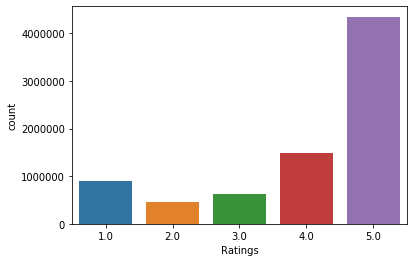

In [182]:
import seaborn as sns
sns.countplot(data=df1,x='Ratings')

#### We inferred that more users rated as rating 5 than remaing ratings. The rating 2 has been rated by less number of userse. The raing 4 is farely good.

# 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

### Short the date for more than 50 Reviwers.

In [0]:
user_index_50 = user_id_count[user_id_count >= 50].index

In [0]:
df2 = df1[df1['User ID'].isin(user_index_50)==True]

In [185]:
df2.head()

,User ID,Product ID,Ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [0]:
user_id_count1=df2['User ID'].value_counts()

In [188]:
user_id_count1

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A3EHJ5519LG7TR     50
AA8RBTN3J2F5H      50
A2QAOP52OEB5EV     50
A21S26XYPGXJZX     50
A3HH340REI4J47     50
Name: User ID, Length: 1540, dtype: int64

#### There are 1540 users only rated 50 or above 50 products.

### Short the data from df2 for the product which has more than 50 reviews.

In [0]:
product_index_50 = product_id_count[product_id_count >= 50].index

In [0]:
df3 = df2[df2['Product ID'].isin(product_index_50)==True]

In [191]:
df3.shape

(79182, 3)

In [291]:
df3.head()

,User ID,Product ID,Ratings
4,A3CLWR1UUZT6TG,0972683275,5.0
5,A3TAS1AG6FMBQW,0972683275,5.0
6,A2Y4H3PXB07WQI,0972683275,4.0
7,A25RTRAPQAJBDJ,0972683275,5.0
8,A3LDPF5FMB782Z,1400501466,5.0


In [292]:
df3.reset_index(inplace = True, drop = True)
df3.head()

,User ID,Product ID,Ratings
0,A3CLWR1UUZT6TG,0972683275,5.0
1,A3TAS1AG6FMBQW,0972683275,5.0
2,A2Y4H3PXB07WQI,0972683275,4.0
3,A25RTRAPQAJBDJ,0972683275,5.0
4,A3LDPF5FMB782Z,1400501466,5.0


In [293]:
df3.shape

(79182, 3)

#### In the aspect of reducing the dataframe, finally we got 79182 records. In this data frame, the useres who are all reviewd atleat 50 products. And the Products has been got atleat 50 reviews. Now our data set is pretty small and easy to handle.

# 3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [0]:
from sklearn.model_selection import train_test_split
trainset_pop, testset_pop = train_test_split(df3, test_size=.30,random_state=123)

In [193]:
trainset_pop.shape

(55427, 3)

In [194]:
testset_pop.shape

(23755, 3)

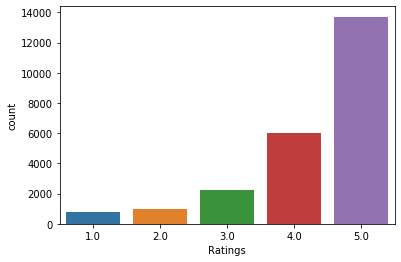

In [284]:
import seaborn as sns
sns.countplot(data=testset_pop,x='Ratings')

#### After Train and Test splitup our final redueds data frame named as trainset_pop. This data frame has aproximately 55.45 K records. This reduction prety more help to run the data without memory error. But this approac is not good to practice. It is followed just to avoid memory kind of error. In the real time project we would use entire data set to get better accuracy.

# 4. Build Popularity Recommendation model.

In [195]:
trainset_pop.groupby('Product ID')['Ratings'].mean().sort_values(ascending=False).head()  

Product ID
B00L3YHF6O    5.0
B003GAAQXM    5.0
B003B41XYO    5.0
B003B48UNG    5.0
B003B4BBFK    5.0
Name: Ratings, dtype: float64

In [196]:
trainset_pop.groupby('Product ID')['Ratings'].count().sort_values(ascending=False).head()  

Product ID
B0088CJT4U    145
B003ES5ZUU    126
B000N99BBC    121
B007WTAJTO    111
B00829TIEK    108
Name: Ratings, dtype: int64

In [0]:
ratings_mean_count = pd.DataFrame(trainset_pop.groupby('Product ID')['Ratings'].mean())

In [0]:
ratings_mean_count['Rating Counts'] = pd.DataFrame(trainset_pop.groupby('Product ID')['Ratings'].count())

In [199]:
ratings_mean_count.head()

,Ratings,Rating Counts
Product ID,,
0972683275,5.0,2
1400501466,3.0,3
1400501520,5.0,1
1400501776,5.0,1
1400532620,5.0,1


In [0]:
ratings_mean_count['Rating weighted Average'] = ratings_mean_count['Ratings'] * ratings_mean_count['Rating Counts']

In [201]:
ratings_mean_count.head()

,Ratings,Rating Counts,Rating weighted Average
Product ID,,,
0972683275,5.0,2,10.0
1400501466,3.0,3,9.0
1400501520,5.0,1,5.0
1400501776,5.0,1,5.0
1400532620,5.0,1,5.0


In [202]:
ratings_mean_count['Rating weighted Average'].sort_values(ascending=False).head()  

Product ID
B003ES5ZUU    623.0
B0088CJT4U    605.0
B000N99BBC    579.0
B007WTAJTO    514.0
B00829TIEK    482.0
Name: Rating weighted Average, dtype: float64

In [203]:
ratings_mean_count.sort_values(["Rating weighted Average"], axis=0, ascending=False).head(10)

,Ratings,Rating Counts,Rating weighted Average
Product ID,,,
B003ES5ZUU,4.944444,126,623.0
B0088CJT4U,4.172414,145,605.0
B000N99BBC,4.785124,121,579.0
B007WTAJTO,4.630631,111,514.0
B00829TIEK,4.462963,108,482.0
B004CLYEDC,4.647059,85,395.0
B008DWCRQW,4.129032,93,384.0
B00834SJNA,4.517647,85,384.0
B00829THK0,4.414634,82,362.0


#### Insight: In the Popularity Recomendation model, We have shported the data using group by option and get best products for the new users. Here I have interduced one more column for Rated weighted Average. This column predicted by product of average rating and number of review. From thic column value we can exactly predict the best products based on rating and number reviews provided by reputed useres.

# 5. Build Collaborative Filtering model.

### For this model, we have used again the same data set "trainset_pop" which was used for "Popularity Recommender model".

In [204]:
!pip install scikit-surprise

In [0]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [206]:
trainset_pop.shape

(55427, 3)

In [207]:
trainset_pop.head()

,User ID,Product ID,Ratings
123654,A32O98PFC3OP7K,B00IAKLM54,5.0
74142,A2YEOR4XJ8N3QE,B004T9RR6I,1.0
64459,A2QRXQPHDMFCQV,B0041RSHWG,4.0
35628,A25FL6VLD7S23S,B001F1ZRAQ,5.0
83418,A1GWG5CWLKJ7ET,B005MJU1DA,4.0


In [0]:
data = Dataset.load_from_df(trainset_pop[['User ID', 'Product ID', 'Ratings']], reader)

In [209]:
data

In [0]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30,random_state=123)

In [211]:
type(trainset)

surprise.trainset.Trainset

In [212]:
user_records = trainset.ur
type(user_records)

collections.defaultdict

In [213]:
user_records[0]

[(0, 4.0),
 (2244, 4.0),
 (2403, 5.0),
 (3234, 5.0),
 (3725, 4.0),
 (3531, 5.0),
 (4410, 3.0),
 (4900, 5.0),
 (3029, 5.0),
 (66, 5.0),
 (3174, 4.0),
 (9098, 5.0),
 (9194, 5.0),
 (1437, 4.0),
 (341, 4.0),
 (1830, 4.0)]

### Cross checking Inner and raw IDs

In [214]:
print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(0))

A1ITRGMT80D5TK
B00284ALF0


In [215]:
len(testset)

16629

In [216]:
print(trainset.to_inner_uid("A3BY5KCNQZXV5U"))

645


### Model Fitting

In [0]:
from surprise import KNNWithMeans
from surprise import accuracy

In [218]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson', 'user_based': False})
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [294]:
sim_products = algo.get_neighbors(trainset.to_inner_iid("B00284ALF0"),5)
[trainset.to_raw_iid(x) for x in sim_products]

['B001RQ2YF0', 'B00176TEGM', 'B000IJY8DS', 'B003GSLEJY', 'B005CVNH1Q']

# 6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [239]:
len(testset)

16629

In [240]:
testset[0:5]

[('AIJQU979J6UFY', 'B005CWJB5G', 5.0),
 ('A1MFAPVBW9BEGD', 'B00009UT9B', 3.0),
 ('A20OBCQWBKCGZT', 'B005A0B3FG', 5.0),
 ('A1G5MI2KREPEIB', 'B000ANCPNM', 5.0),
 ('A2FWZ58M6IQMD7', 'B002DW92IE', 2.0)]

In [283]:
test_pred = algo.test(testset)
accuracy.rmse(test_pred)

RMSE: 1.1278


1.1278412016732569

### From the "Collaborative Filtering model" we got RMSE value as 1.12. It means our predicted rating might varry +/- 1.12.

In [242]:
testset[12]

('ANYC38I00IRVK', 'B0058P0I2C', 5.0)

In [243]:
test_pred[12]

Prediction(uid='ANYC38I00IRVK', iid='B0058P0I2C', r_ui=5.0, est=4.297077168926234, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

In [0]:
test_pred_df = pd.DataFrame(test_pred)
test_pred_df["was_impossible"] = [x["was_impossible"] for x in test_pred_df["details"]]

In [245]:
test_pred_df.loc[test_pred_df.was_impossible].head(5)

,uid,iid,r_ui,est,details,was_impossible
12,ANYC38I00IRVK,B0058P0I2C,5.0,4.297077,"{'was_impossible': True, 'reason': 'User and/o...",True
13,A3V0YR50F1XSKP,B000HGMMH6,5.0,4.297077,"{'was_impossible': True, 'reason': 'User and/o...",True
16,A1NNMOD9H36Q8E,B002K4512Q,5.0,4.297077,"{'was_impossible': True, 'reason': 'User and/o...",True
25,A32482Z7XIKDQX,B00F42V83C,5.0,4.297077,"{'was_impossible': True, 'reason': 'User and/o...",True
52,A3V0YR50F1XSKP,B00763WKZW,5.0,4.297077,"{'was_impossible': True, 'reason': 'User and/o...",True


In [0]:
testset_new = trainset.build_anti_testset()

In [247]:
len(testset_new)

19654722

In [248]:
testset_new[0:5]

[('A1ITRGMT80D5TK', 'B001RQ2YF0', 4.297077168926234),
 ('A1ITRGMT80D5TK', 'B00176TEGM', 4.297077168926234),
 ('A1ITRGMT80D5TK', 'B000IJY8DS', 4.297077168926234),
 ('A1ITRGMT80D5TK', 'B003GSLEJY', 4.297077168926234),
 ('A1ITRGMT80D5TK', 'B005CVNH1Q', 4.297077168926234)]

# 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [0]:
predictions = algo.test(testset_new[0:10000])

In [252]:
predictions[100]

Prediction(uid='A1ITRGMT80D5TK', iid='B001QTXL82', r_ui=4.297077168926234, est=4.6, details={'actual_k': 0, 'was_impossible': False})

In [0]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [0]:
predictions_df.columns = ["userId","iid","est_rating"]

In [0]:
predictions_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)

In [0]:
top_5_recos = predictions_df.groupby("userId").head(5).reset_index(drop=True)

In [265]:
top_5_recos

,userId,iid,est_rating
0,A1ITRGMT80D5TK,B000IJY8DS,5.0
1,A1ITRGMT80D5TK,B005CVNH1Q,5.0
2,A1ITRGMT80D5TK,B000AL8JKW,5.0
3,A1ITRGMT80D5TK,B002JCSV5I,5.0
4,A1ITRGMT80D5TK,B0083XTQ42,5.0


### From the above model, we can recommend the best 5 productes for each user.

## To reduce our RMSE value, we are traing some other model.

# SVD Based Recommendation

In [0]:
from surprise import SVD
from surprise import accuracy

In [272]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [0]:
test_pred = svd_model.test(testset)

In [274]:
accuracy.rmse(test_pred)

RMSE: 2.5919


2.5919423391441163

#### From the above result, we infer that RMSE value increased. So we are preding the best model through grid search using hyper parameter.

### <b> Parameter tuning of SVD Recommendation system </b>

In [0]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [0]:
gs.fit(data)

In [277]:
# get all parameter combinations
gs.param_combinations

[{'n_factors': 5, 'reg_all': 0.01},
 {'n_factors': 5, 'reg_all': 0.02},
 {'n_factors': 10, 'reg_all': 0.01},
 {'n_factors': 10, 'reg_all': 0.02},
 {'n_factors': 15, 'reg_all': 0.01},
 {'n_factors': 15, 'reg_all': 0.02}]

In [278]:
# get best parameters
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [0]:
# Use the "best model" for prediction
gstest = gs.test(testset)

In [296]:
accuracy.rmse(gstest)

RMSE: 0.8532


0.8532478792377717

#### From the above grid search model, our RMSE value reduced as 0.85.

# Insights: 

Our original data set has approximately 7.8 million records with 4 columns.

To make a dataset as less sparse and denser, we have shortened the records by users who rated more than or equal to 50 products. After that again we filtered as the product whic has reviewd by more than 50 useres. Finllay we got 79.18 K records. It means our final dataset(df3) has users who are all rated atleast 50 products. Also the final data set has products rated by atleast 50 users.

Then we splitted the data as "trainset_pop" and "testset_pop". After this split up, our data frame modified as 55427 rows and 3 columns.

We do not find any missing values in the final data set. Also we consider the filtered data frame has more strengthen than original dataset in the aspect of reputed reviers and productes.

Popularity Recommended model:

From Popularity Recommended model, we can recommend best prodiucts to new users who were not already have records.

In this model, we used groupby option to short the best products by raing wise. Also we considered the number of ratings. Over all, we recomended the prodcuts those have good raings with more times. This model helps to recomened the best products to new customers who are not part of the dataset. This model very useful for cold start. That means start up of business which has not no past cusomer history.

Collaborative Filtering model:

This model used based on the past data. Here our objective is recomending best products for every users based on the user habit or interset with respective of thier past rating of the similar products.

In this model, First we used the surprise library. In this library, while we load the data, our input data frame becomes "Trainset" format. The splitted test set becomes list. And the entire data converted to inner id. Our original data named as raw id. Using to_inner/raw, we can convert and very the data as we wish.

After we fitted the model, we can find similer products using get neighbour concept. Also we can predict the test data. Then we can calculate RMSE by comparing both test prediction and actual rating.

In the "Collaborative Filtering model" we got RMSE valyue as 1.2. It means our test data set predicted rating might vary +/- 1.2 from actual ratting. This is not a best accuracy.

So we have tried some other model like SVD and Grid Search. In the SVD model, we got around 2.4 as RMSE value. After that we have tried Grid Searc model. It provided RMSE as 0.83. In our analysis this pretty good while compare with other models.

Our main objective is recomended 5 products to every user.

After finding similar products we have find the antitestset for testset data. Here we have predicted the rating for the all products which were not rated by the particuler user. And predited the best 5 relvent productes for every user based on their similar product ratings.

Conclusion: 

We have reduced records to make the dataset as more dense and less sparse.

Using Popularity Recommendation model, we have recomended best products which has high rating with more frequncy to new users.

Using Collaborative Filtering model, we can find similar products and test data rating prediction. Using RMSE, we can find the accuracy of the model.

To build the better accuracy we have applied grid search model and improved the accuracy from 1.2 to 0.8.

Using antitestset generation, we can predict the best relevent products for every users.